## **Linear Regression Modelling**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [62]:
symbol = "CELH"
start_date = "2019-03-14"
end_date = "2024-03-14"

# Download historical data using yfinance
stock_data = yf.download(symbol, start=start_date, end=end_date)

# Display the first few rows of the data
stock_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-14,1.293333,1.300000,1.206667,1.260000,1.260000,365700
2019-03-15,1.266667,1.616667,1.266667,1.616667,1.616667,1044000
2019-03-18,1.486667,1.666667,1.443333,1.663333,1.663333,579300
2019-03-19,1.663333,1.666667,1.600000,1.656667,1.656667,299100
2019-03-20,1.663333,1.663333,1.543333,1.610000,1.610000,210600
...,...,...,...,...,...,...
2024-03-07,87.860001,90.250000,87.540001,89.559998,89.559998,4140800
2024-03-08,90.059998,91.070000,87.550003,88.889999,88.889999,4275900
2024-03-11,87.980003,88.199997,82.370003,85.309998,85.309998,5258400


In [63]:
# Adj Close data from the historical data
stock_data['Adj Close']

Date
2019-03-14     1.260000
2019-03-15     1.616667
2019-03-18     1.663333
2019-03-19     1.656667
2019-03-20     1.610000
                ...    
2024-03-07    89.559998
2024-03-08    88.889999
2024-03-11    85.309998
2024-03-12    91.070000
2024-03-13    96.110001
Name: Adj Close, Length: 1259, dtype: float64

In [64]:
# Extract relevant features (you may need to adjust this based on your model)
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = stock_data[features]
y = stock_data['Adj Close']

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on the test set: {mse}')

Mean Squared Error on the test set: 0.4369774715083901


In [66]:
# Now, download the real-world data for the prediction period
prediction_start_date = "2023-12-31"
prediction_end_date = "2024-03-31"
prediction_data = yf.download(symbol, start=prediction_start_date, end=prediction_end_date)

[*********************100%%**********************]  1 of 1 completed


In [67]:
# Make predictions on the prediction set
predictions_future = model.predict(prediction_data[features])

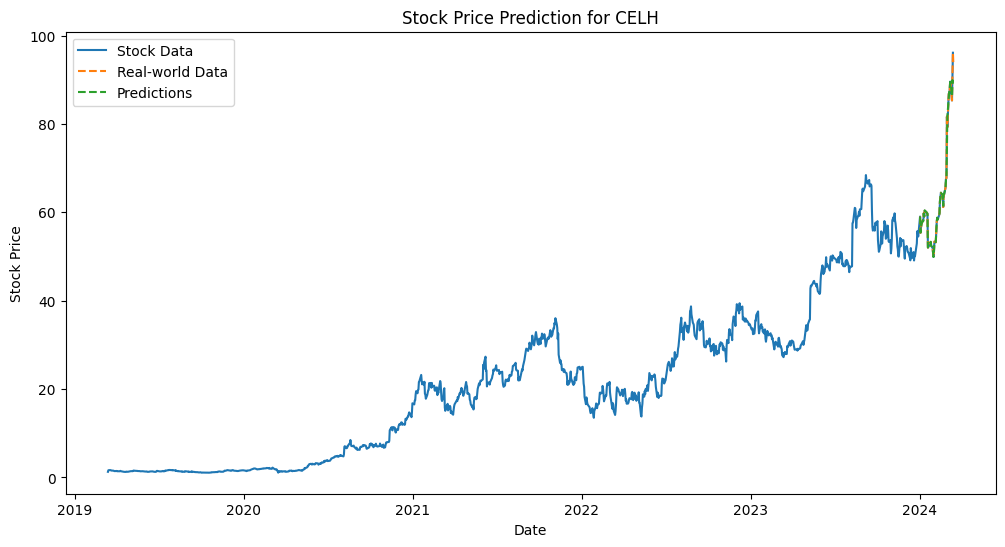

In [68]:
# Plot the real-world data and predictions
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Adj Close'], label='Stock Data')
plt.plot(prediction_data.index, prediction_data['Adj Close'], label='Real-world Data', linestyle='--')
plt.plot(prediction_data.index, predictions_future, label='Predictions', linestyle='--')
plt.title(f'Stock Price Prediction for {symbol}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [69]:
# Download historical data using yfinance
historical_data = yf.download(symbol, start=start_date, end=end_date)

# Use 'Adj Close' prices as the target variable
y = historical_data['Adj Close'].values.reshape(-1, 1)

# Use the index as a feature
X = historical_data.index.values.reshape(-1, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[*********************100%%**********************]  1 of 1 completed


In [70]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [71]:
# Predict the stock prices for the rest of the year
future_dates = pd.date_range(start="2024-03-01", end="2024-12-31")
future_dates_numeric = pd.to_numeric(future_dates)
future_dates_numeric = future_dates_numeric.values.reshape(-1, 1)
future_predictions = model.predict(future_dates_numeric)

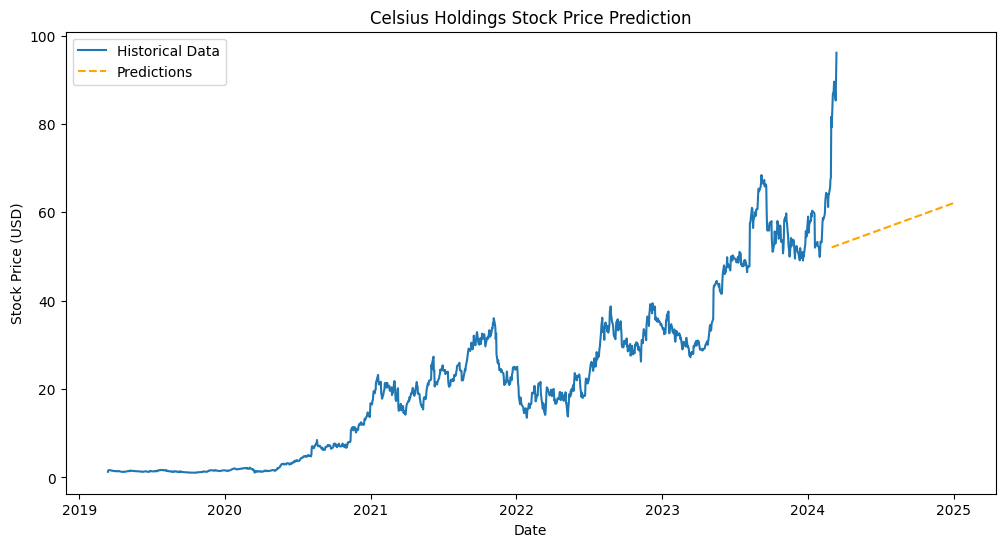

In [73]:
# Plot the historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, y, label='Historical Data')
plt.plot(future_dates, future_predictions, label='Predictions', linestyle='dashed', color='orange')
plt.title('Celsius Holdings Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()

## **KNN Modelling**



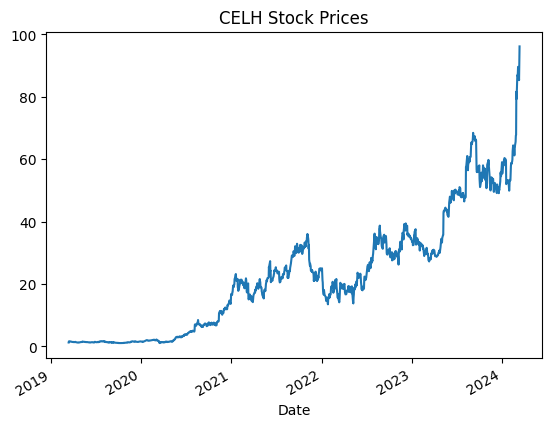

In [74]:
stock_data['Close'].plot()
plt.title("CELH Stock Prices")
plt.show()

In [75]:
#The Problem can be seen in two ways :Classifictaion and Regression
#Part 1 - Classifictaion :Whether someone should buy or sell the stock
#######PART 1############
#Input features

stock_data['Open-Close'] = stock_data['Open'] - stock_data['Close']
stock_data['High-Low'] = stock_data['High'] - stock_data['Low']
stock_data=stock_data.dropna()


In [76]:
X = stock_data[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2019-03-14,0.033333,0.093333
2019-03-15,-0.350000,0.350000
2019-03-18,-0.176666,0.223334
2019-03-19,0.006666,0.066667
2019-03-20,0.053333,0.120000


In [77]:
#Classification :Y is target variable
#buy denoted by (+1), sell denoted by (-1)

y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

In [78]:
y

array([ 1,  1, -1, ...,  1,  1, -1])

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [81]:
#using GridSearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn,params,cv=5)

In [82]:
#fit the model
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [83]:
accuracy_train = accuracy_score(y_train,model.predict(X_train))
accuracy_test = accuracy_score(y_test,model.predict(X_test))

In [84]:
print('Train data Accuracy :%.2f' %accuracy_train)
print('Test data Accuracy: %.2f' %accuracy_test)

Train data Accuracy :0.70
Test data Accuracy: 0.47


In [85]:
y =  stock_data['Close']

In [86]:
y

Date
2019-03-14     1.260000
2019-03-15     1.616667
2019-03-18     1.663333
2019-03-19     1.656667
2019-03-20     1.610000
                ...    
2024-03-07    89.559998
2024-03-08    88.889999
2024-03-11    85.309998
2024-03-12    91.070000
2024-03-13    96.110001
Name: Close, Length: 1259, dtype: float64

In [87]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.25)

#GridSearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg,params,cv=10)

#fit the model and make predictions
model_reg.fit(X_train_reg,y_train_reg)
predictions = model_reg.predict(X_test_reg)
print(predictions)

[16.04857135 31.94095203 19.54571455 31.32761901 46.15357147  1.30095243
  6.5945238   3.31761906 32.53499971 24.50976195 23.13119054 31.36380931
 28.29238081  1.49047622 29.02619035  1.51452371 24.62809529  1.62619049
  7.3892857  26.86476169 48.01309545 30.35928604 21.48047604  1.24309536
 24.96571439  1.4714285  21.90952383 43.73952389 33.03023842 21.48142873
  1.54761894  3.22500016 14.67761922 25.03357145 31.70833349 34.5795237
 42.28142834 36.93380969  4.97499997 21.01333366 31.44976153 28.88142845
 35.16690465 43.26618985 30.69095216  2.01499985 30.73214272 44.3661905
 40.67880971 49.1626185  36.13666657  3.39904757  1.49476186  1.57333331
 23.86142881 28.13690482 11.92357154  1.31047623 32.2990472  25.55928585
 42.46761853  1.31880951 38.88261924  1.44166665  1.60976191 29.8557148
 27.68119022 33.28333303 48.73761913  2.4757142  14.96238099 23.15523815
  1.39047614  1.43142849  1.42666663 22.97499984 47.25999968 28.31666667
 23.01547629 31.69166677 31.68666666 46.50000014  7.68

In [88]:
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

26.123566068481065

In [89]:
valid = pd.DataFrame({'Actual Close':y_test_reg, 'Predicted Close value':predictions})
valid.head(10)

,Actual Close,Predicted Close value
Date,,
2023-07-21,47.793331,16.048571
2022-12-15,35.713333,31.940952
2021-06-17,21.543333,19.545715
2022-06-30,21.753332,31.327619
2023-05-18,44.459999,46.153571
2019-06-04,1.333333,1.300952
2020-09-10,6.930000,6.594524
2020-08-04,4.750000,3.317619
2021-12-01,20.969999,32.535000


## **LSTM Modelling**

In [90]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-5, end.month, end.day)

In [91]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low
Date,,,,,,,,
2019-03-14,1.293333,1.300000,1.206667,1.260000,1.260000,365700,0.033333,0.093333
2019-03-15,1.266667,1.616667,1.266667,1.616667,1.616667,1044000,-0.350000,0.350000
2019-03-18,1.486667,1.666667,1.443333,1.663333,1.663333,579300,-0.176666,0.223334
2019-03-19,1.663333,1.666667,1.600000,1.656667,1.656667,299100,0.006666,0.066667
2019-03-20,1.663333,1.663333,1.543333,1.610000,1.610000,210600,0.053333,0.120000


In [92]:
stock_data.shape

(1259, 8)

In [93]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.000000,1259.000000
mean,22.440167,23.106137,21.800172,22.475311,22.475311,2.958701e+06,-0.035144,1.305965
std,18.859866,19.338400,18.446397,18.913964,18.913964,2.965721e+06,1.104918,1.227884
min,1.056667,1.080000,1.020000,1.056667,1.056667,3.990000e+04,-17.710003,0.010000
25%,3.115000,3.241667,3.071667,3.160000,3.160000,1.502000e+06,-0.396667,0.228333
50%,20.353333,21.223333,19.459999,20.393333,20.393333,2.527500e+06,0.000000,1.213333
75%,32.525000,33.525002,31.583334,32.573334,32.573334,3.568200e+06,0.326667,1.855000
max,92.580002,96.629997,92.500000,96.110001,96.110001,3.993630e+07,5.566666,19.099998


In [94]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-03-14 to 2024-03-13
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1259 non-null   float64
 1   High        1259 non-null   float64
 2   Low         1259 non-null   float64
 3   Close       1259 non-null   float64
 4   Adj Close   1259 non-null   float64
 5   Volume      1259 non-null   int64  
 6   Open-Close  1259 non-null   float64
 7   High-Low    1259 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 88.5 KB


In [95]:
stock_data.isna().sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Open-Close    0
High-Low      0
dtype: int64

Text(0.5, 1.0, 'Closing price of CELH data')

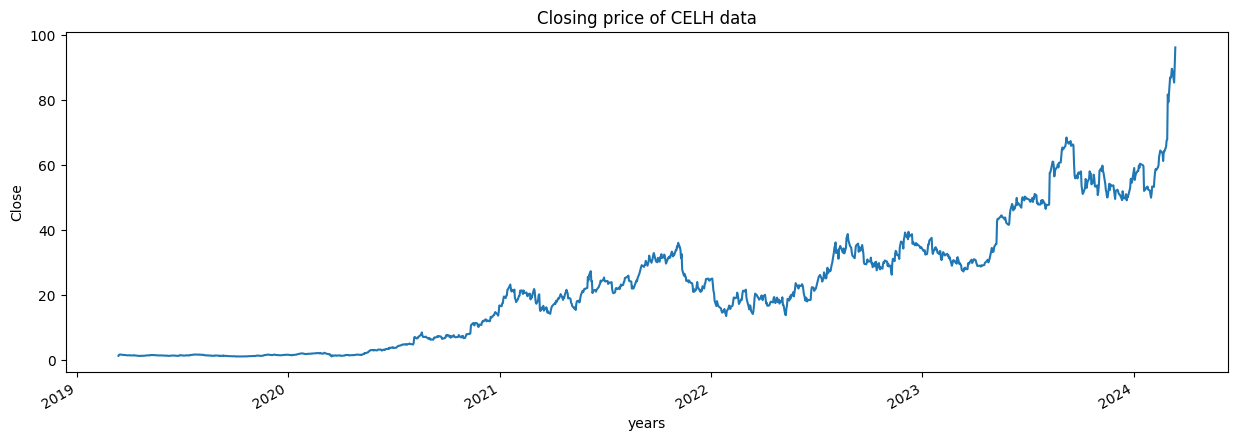

In [96]:
plt.figure(figsize = (15,5))
stock_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Close")
plt.title("Closing price of CELH data")

In [97]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of CELH data")

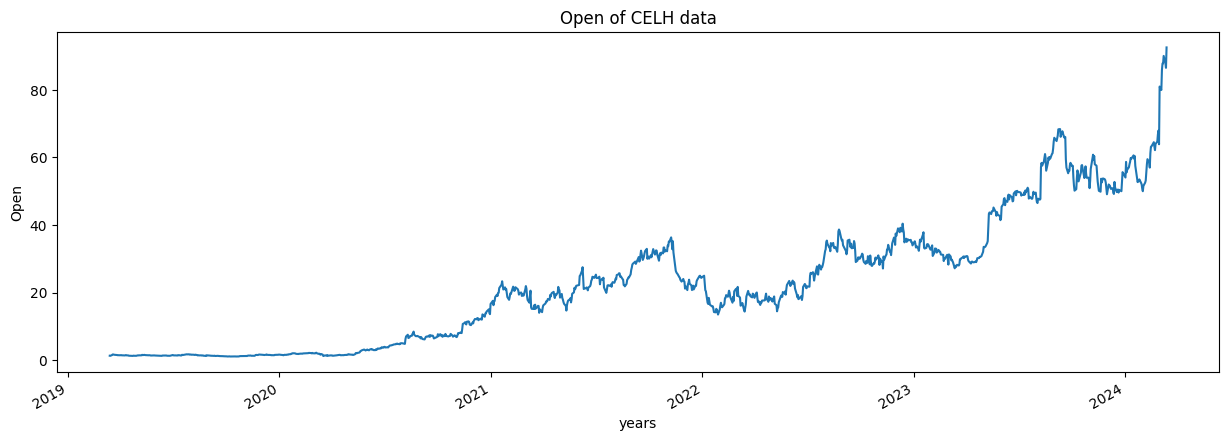

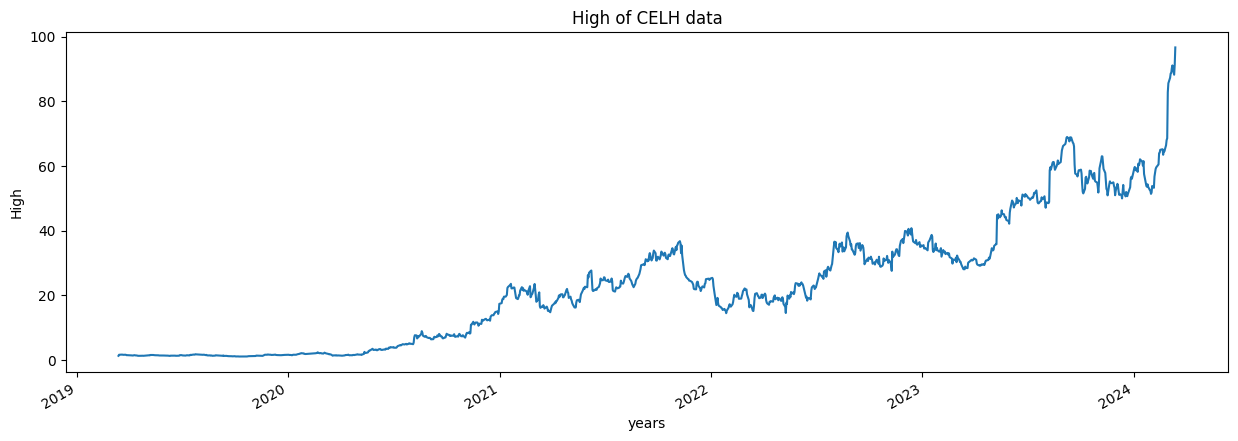

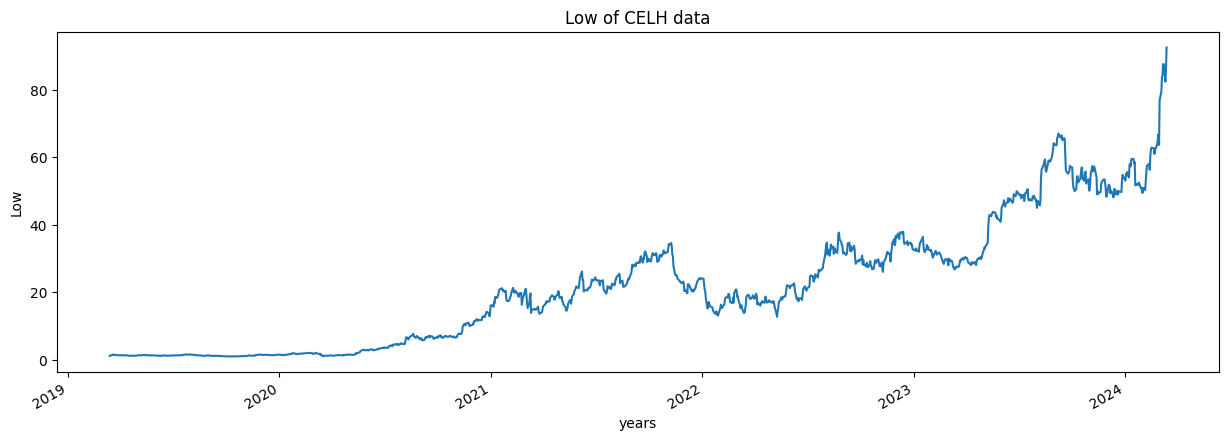

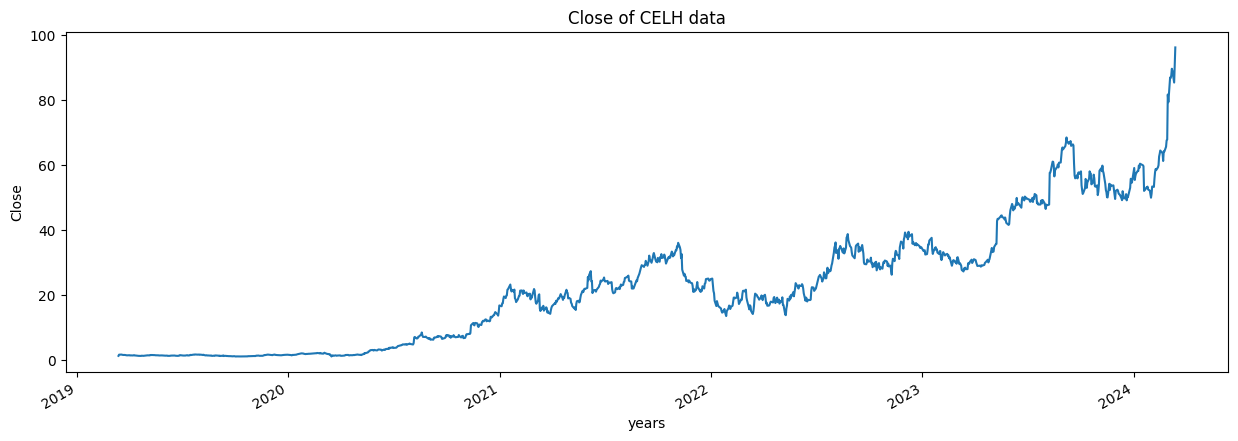

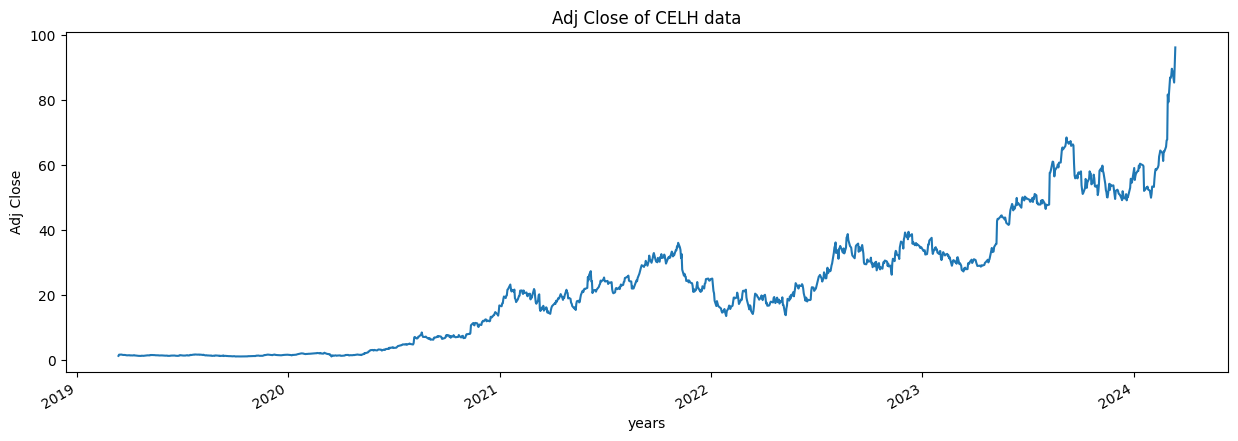

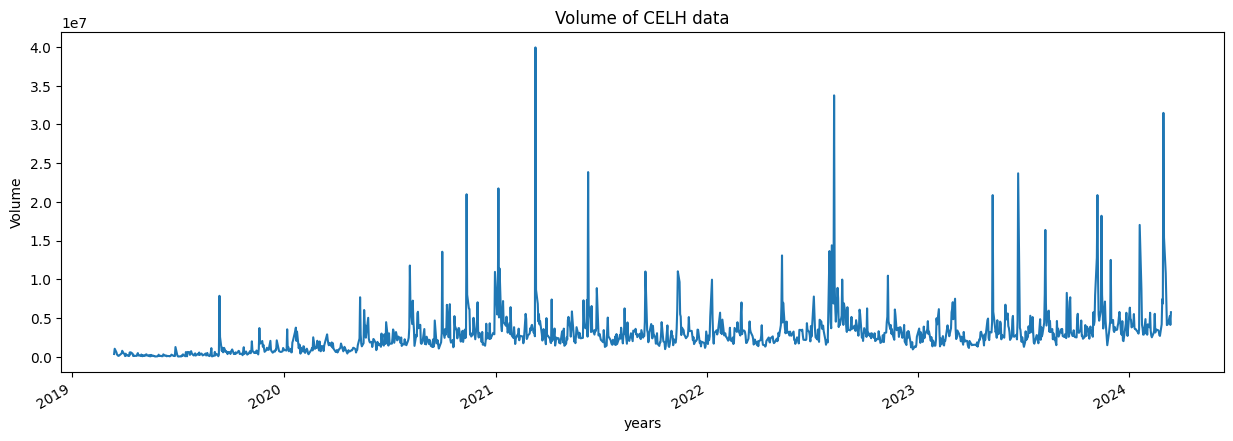

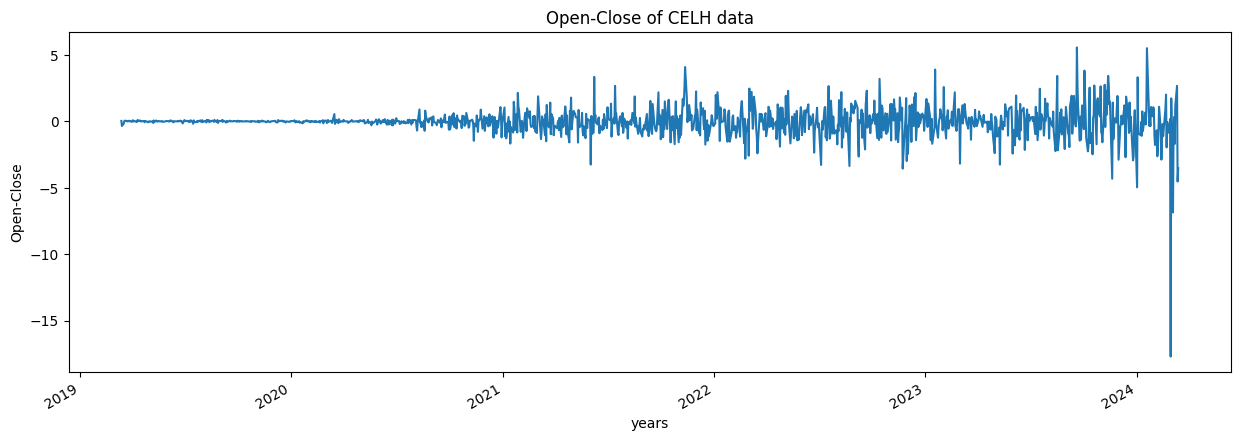

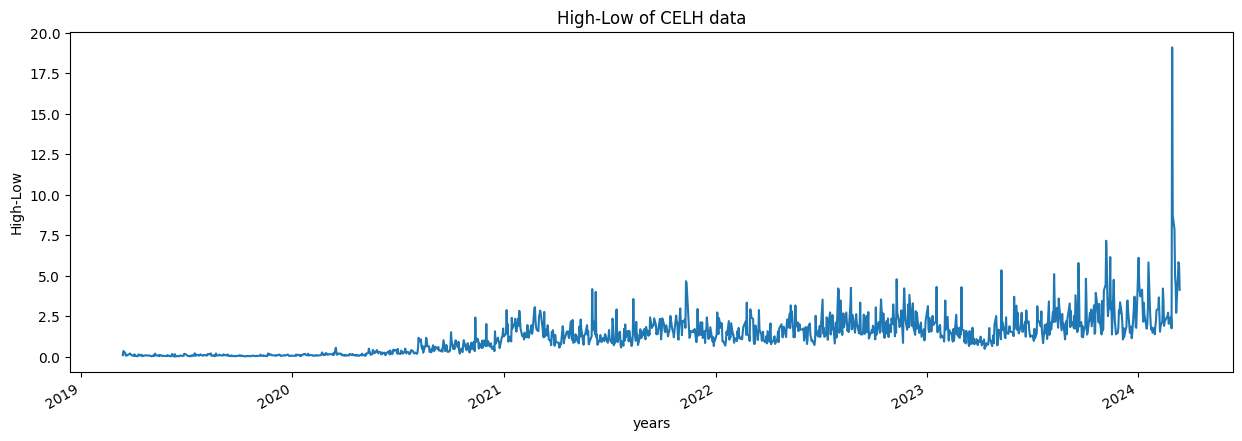

In [98]:
for column in stock_data.columns:
    plot_graph((15,5),stock_data[column], column)

In [99]:
#To find the MA values
for i in range(2019,2024):
    print(i,list(stock_data.index.year).count(i))

2019 203
2020 253
2021 252
2022 251
2023 250


In [100]:
stock_data['MA_for_250_days'] = stock_data['Close'].rolling(250).mean()

In [101]:
stock_data['MA_for_250_days'][0:250].tail()

Date
2020-03-04         NaN
2020-03-05         NaN
2020-03-06         NaN
2020-03-09         NaN
2020-03-10    1.466973
Name: MA_for_250_days, dtype: float64

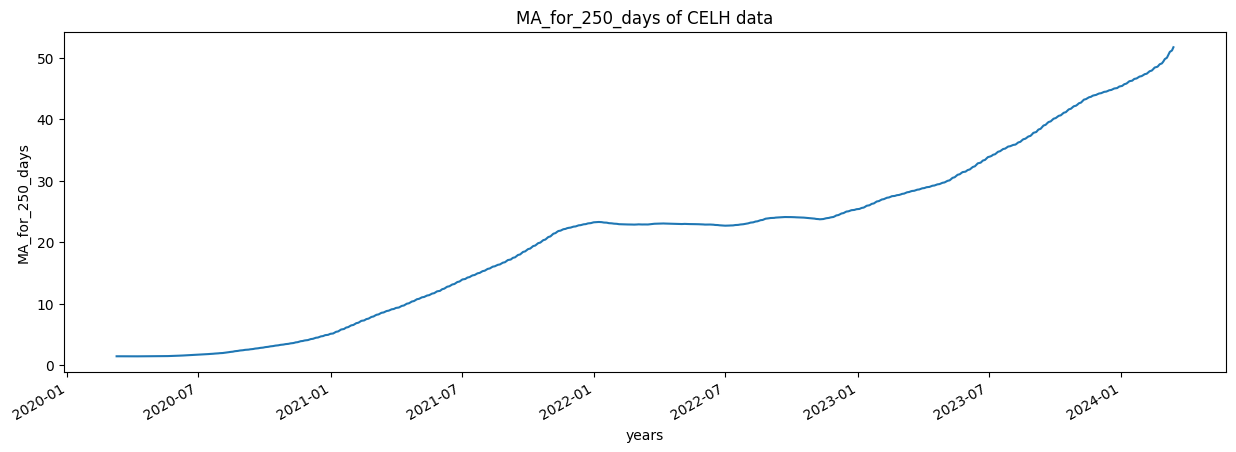

In [102]:
plot_graph((15,5), stock_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

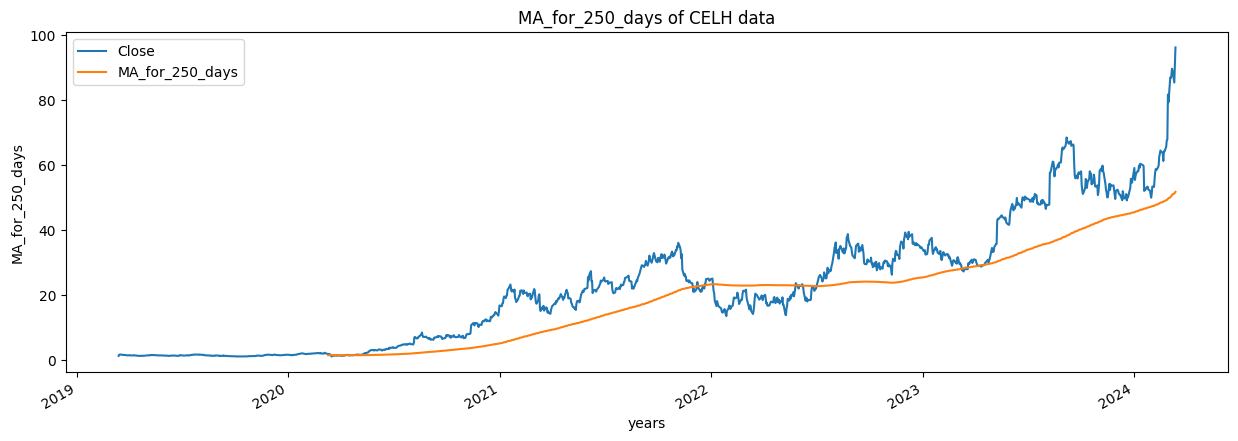

In [103]:
plot_graph((15,5), stock_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

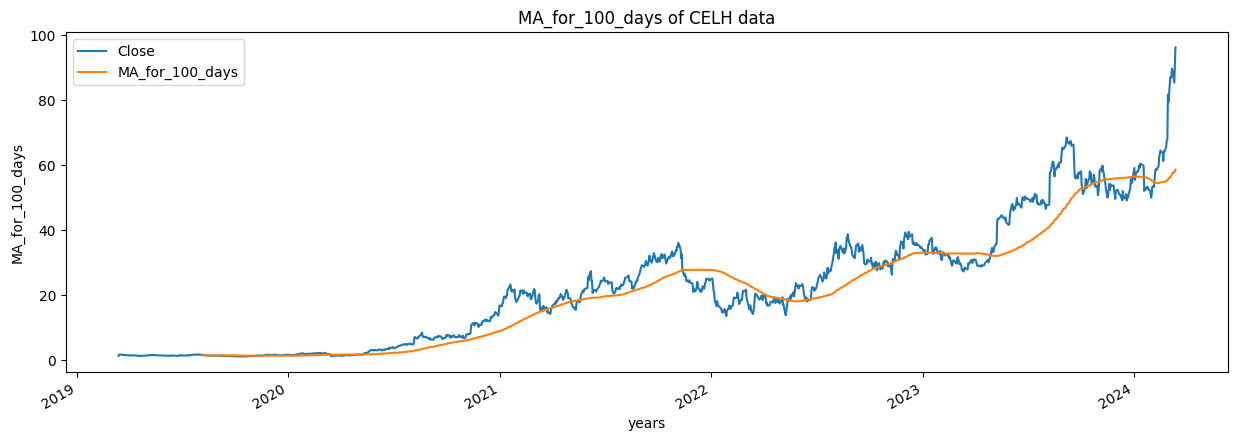

In [104]:
stock_data['MA_for_100_days'] = stock_data['Close'].rolling(100).mean()
plot_graph((15,5), stock_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

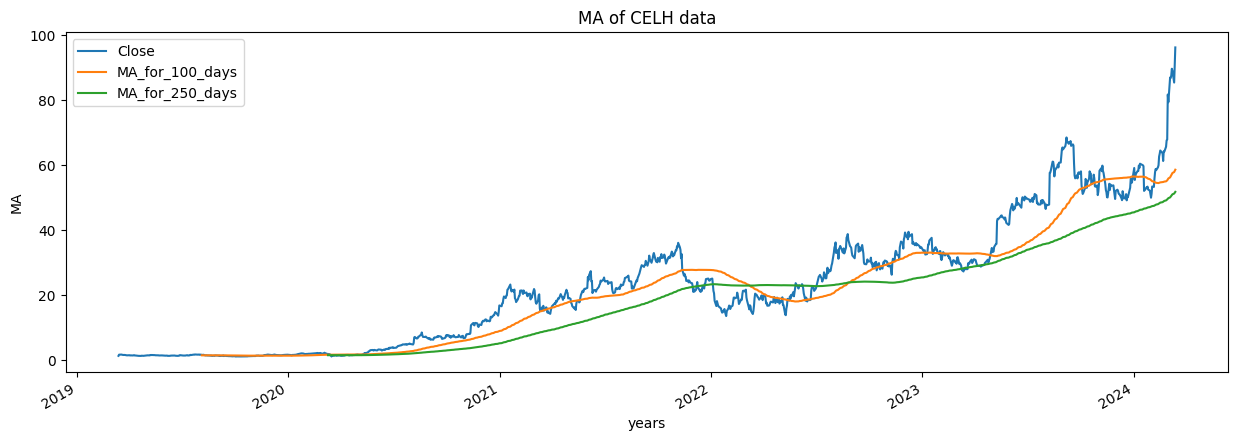

In [105]:
plot_graph((15,5), stock_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [106]:
close_price = stock_data[['Close']]

In [107]:
max(close_price.values),min(close_price.values)

(array([96.11000061]), array([1.05666697]))

In [108]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00213915],
       [0.00589143],
       [0.00638238],
       ...,
       [0.88637954],
       [0.94697713],
       [1.        ]])

In [109]:
len(scaled_data)

1259

In [110]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [111]:
x_data[0],y_data[0]

(array([[0.00213915],
        [0.00589143],
        [0.00638238],
        [0.00631225],
        [0.00582129],
        [0.00564595],
        [0.00501472],
        [0.00508486],
        [0.00466405],
        [0.00424323],
        [0.00396268],
        [0.00382241],
        [0.00424323],
        [0.00420816],
        [0.00336653],
        [0.00368214],
        [0.00354186],
        [0.0034016 ],
        [0.00389255],
        [0.0043835 ],
        [0.00343666],
        [0.00336653],
        [0.00270023],
        [0.00255996],
        [0.00210408],
        [0.00210408],
        [0.00192874],
        [0.0026301 ],
        [0.00248982],
        [0.00213915],
        [0.00220929],
        [0.00301584],
        [0.0034016 ],
        [0.0034016 ],
        [0.0035068 ],
        [0.00378735],
        [0.00364707],
        [0.00368214],
        [0.00508486],
        [0.00452378],
        [0.00490952],
        [0.0044887 ],
        [0.00434843],
        [0.00452378],
        [0.0044887 ],
        [0

In [112]:
int(len(x_data)*0.7)

811

In [113]:
1260-100-int(len(x_data)*0.7)

349

In [114]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [115]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(811, 100, 1)
(811, 1)
(348, 100, 1)
(348, 1)


In [116]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [117]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [118]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [119]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
811/811 [==============================] - 89s 102ms/step - loss: 8.0402e-04
Epoch 2/2
811/811 [==============================] - 81s 100ms/step - loss: 3.0819e-04


In [120]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
predictions = model.predict(x_test)
predictions

11/11 [==============================] - 3s 129ms/step


array([[0.28135833],
       [0.27987033],
       [0.28382033],
       [0.2902697 ],
       [0.29375887],
       [0.2979537 ],
       [0.29989108],
       [0.29979527],
       [0.2944251 ],
       [0.29223767],
       [0.28848928],
       [0.28670025],
       [0.28064358],
       [0.27141678],
       [0.27729785],
       [0.29002666],
       [0.2975039 ],
       [0.3095157 ],
       [0.32084447],
       [0.32645833],
       [0.32497963],
       [0.32086232],
       [0.31388944],
       [0.32162082],
       [0.33677414],
       [0.3467491 ],
       [0.34567833],
       [0.3524254 ],
       [0.36091372],
       [0.37179345],
       [0.37408358],
       [0.37395814],
       [0.3699623 ],
       [0.37483865],
       [0.37468058],
       [0.3754139 ],
       [0.3766755 ],
       [0.37812647],
       [0.36836314],
       [0.36159495],
       [0.35454023],
       [0.35079733],
       [0.35142902],
       [0.35051584],
       [0.3510434 ],
       [0.3496493 ],
       [0.34646678],
       [0.343

In [122]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[27.800714],
       [27.659275],
       [28.034735],
       [28.64777 ],
       [28.979425],
       [29.378159],
       [29.562313],
       [29.553205],
       [29.042753],
       [28.834831],
       [28.478535],
       [28.308481],
       [27.732775],
       [26.855736],
       [27.414751],
       [28.624668],
       [29.335403],
       [30.477167],
       [31.554003],
       [32.08762 ],
       [31.947063],
       [31.5557  ],
       [30.892904],
       [31.627798],
       [33.068172],
       [34.016323],
       [33.914543],
       [34.555874],
       [35.36272 ],
       [36.396873],
       [36.61456 ],
       [36.602634],
       [36.222816],
       [36.68633 ],
       [36.671303],
       [36.74101 ],
       [36.860928],
       [36.998848],
       [36.070812],
       [35.42747 ],
       [34.756897],
       [34.401123],
       [34.461166],
       [34.374367],
       [34.42451 ],
       [34.292   ],
       [33.98949 ],
       [33.73843 ],
       [33.66372 ],
       [33.251015],


In [123]:
y_test

array([[0.28419132],
       [0.2987095 ],
       [0.30607377],
       [0.30228644],
       [0.31052742],
       [0.30828307],
       [0.30645953],
       [0.29274793],
       [0.3005681 ],
       [0.29131015],
       [0.29397531],
       [0.27770374],
       [0.26469351],
       [0.30172535],
       [0.31624351],
       [0.30856362],
       [0.33384767],
       [0.34191331],
       [0.33854679],
       [0.32900829],
       [0.32585214],
       [0.31561229],
       [0.35331041],
       [0.37196662],
       [0.36698694],
       [0.34931264],
       [0.37933091],
       [0.38648475],
       [0.40121334],
       [0.38662506],
       [0.38851873],
       [0.37940102],
       [0.40349277],
       [0.38774723],
       [0.3931477 ],
       [0.39462055],
       [0.39581288],
       [0.36460232],
       [0.37042361],
       [0.36004347],
       [0.36158647],
       [0.36719735],
       [0.35955253],
       [0.36337496],
       [0.35720295],
       [0.35187264],
       [0.35145181],
       [0.353

In [124]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[28.06999969],
       [29.45000076],
       [30.14999962],
       [29.79000092],
       [30.57333374],
       [30.36000061],
       [30.18666649],
       [28.88333321],
       [29.62666702],
       [28.74666786],
       [29.        ],
       [27.4533329 ],
       [26.21666718],
       [29.73666763],
       [31.11666679],
       [30.38666725],
       [32.79000092],
       [33.55666733],
       [33.23666763],
       [32.33000183],
       [32.02999878],
       [31.05666733],
       [34.63999939],
       [36.41333389],
       [35.93999863],
       [34.25999832],
       [37.11333466],
       [37.79333115],
       [39.19333267],
       [37.80666733],
       [37.98666763],
       [37.11999893],
       [39.40999985],
       [37.91333389],
       [38.42666626],
       [38.56666565],
       [38.68000031],
       [35.71333313],
       [36.26666641],
       [35.27999878],
       [35.42666626],
       [35.95999908],
       [35.23333359],
       [35.59666824],
       [35.00999832],
       [34

In [125]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

3.7558470970586524

In [126]:
import pandas as pd
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = stock_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2022-10-24,28.070000,27.800714
2022-10-25,29.450001,27.659275
2022-10-26,30.150000,28.034735
2022-10-27,29.790001,28.647770
2022-10-28,30.573334,28.979425


<Figure size 640x480 with 0 Axes>

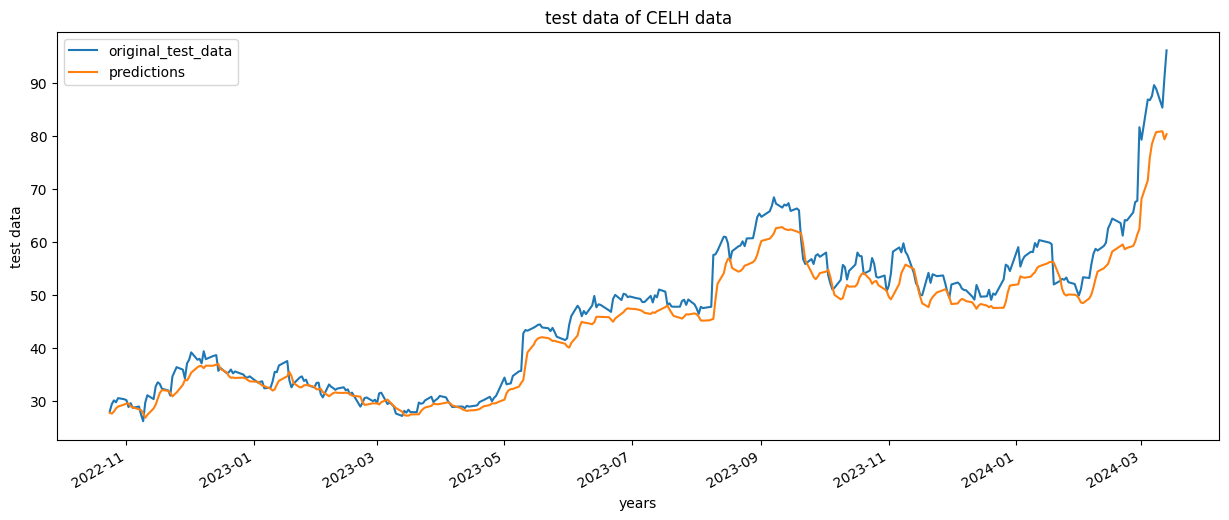

In [127]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

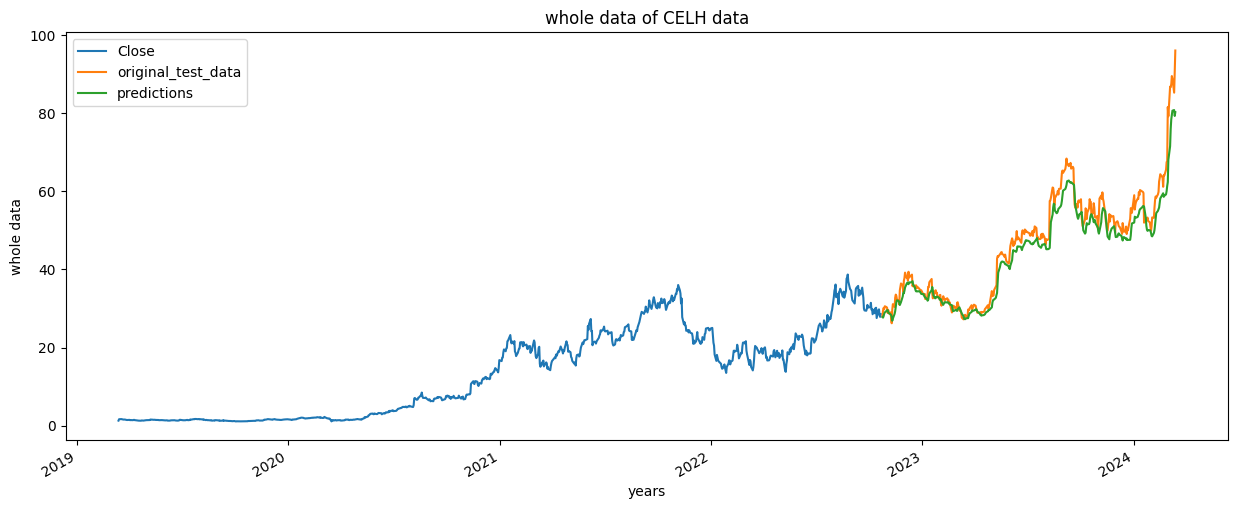

In [128]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [130]:
model.save("celh_lstm_model.keras")